In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Check if we're using GPU (should be available in Colab)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [2]:
# Load the IMDB dataset
print("Loading IMDB dataset...")
num_words = 10000  # Keep top 10,000 most frequent words
max_len = 200      # Maximum length of sequences

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 200)
Test data shape: (25000, 200)


In [3]:
# Model parameters
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.5

# Build the model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len),
    SpatialDropout1D(dropout_rate),
    LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
    Dropout(dropout_rate),
    Dense(64, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Training parameters
batch_size = 64
epochs = 10

# Train the model
print("Training the model...")
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

Training the model...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 363ms/step - accuracy: 0.5860 - loss: 0.6500 - val_accuracy: 0.8050 - val_loss: 0.4233
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 155s 396ms/step - accuracy: 0.7922 - loss: 0.4682 - val_accuracy: 0.8309 - val_loss: 0.3817
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 395ms/step - accuracy: 0.8234 - loss: 0.4176 - val_accuracy: 0.8219 - val_loss: 0.3956
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 182s 344ms/step - accuracy: 0.8511 - loss: 0.3667 - val_accuracy: 0.8272 - val_loss: 0.3917
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 153s 393ms/step - accuracy: 0.8564 - loss: 0.3484 - val_accuracy: 0.8325 - val_loss: 0.3897
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 396ms/step - accuracy: 0.8634 - loss: 0.3347 - val_accuracy: 0.8325 - val_loss: 0.3921
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 182s 346ms/step - accuracy: 0.8788 - loss: 0.3052 - val_accuracy: 0.8423 - val_loss: 0.3831
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 394ms/ste

Test Accuracy: 0.8497
Test Loss: 0.3955
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



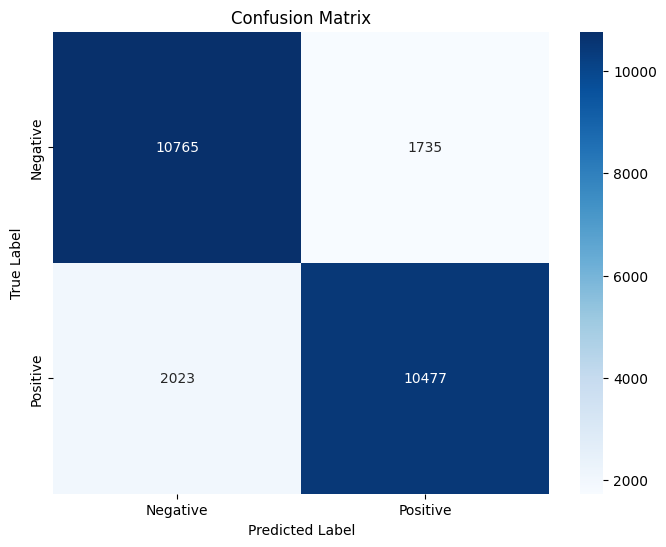

In [5]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()